In [2]:
#importing required packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import datetime 
from sklearn.metrics import r2_score
%matplotlib inline

In [3]:
#loading the dataset
df = pd.read_csv('D:\\Simpli learn\\Project\\1577429980_walmart_store_sales\\Walmart_Store_sales.csv')
df = df[df['Store'] == 1]
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
#Extracting features from Date  
df["Year"] = pd.to_datetime(df["Date"], format="%d-%m-%Y").dt.year
df["Day"] = pd.to_datetime(df["Date"], format="%d-%m-%Y").dt.day
df["Month"] = pd.to_datetime(df["Date"], format="%d-%m-%Y").dt.month
df.dropna(inplace=True)

In [6]:
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Day,Month
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010,19,2
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010,26,2
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3


In [18]:
df["New_Date"] = df["Day"].apply(str)  +df["Month"].apply(str) + df["Year"].apply(str)

In [19]:
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Day,Month,New_Date,Super_Bowl
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,522010,0.0
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,1222010,0.0
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010,19,2,1922010,0.0
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010,26,2,2622010,0.0
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,532010,0.0


In [20]:
#Adding Holidays

df.loc[(df['New_Date'] == '1222010') | (df['New_Date'] == '1122011') | (df['New_Date'] == '1022012') | (df['New_Date'] == '822013'), 'Super_Bowl'] = 1
df.loc[(df['New_Date'] != '1222010') | (df['New_Date'] != '1122011') | (df['New_Date'] != '1022012') | (df['New_Date'] != '822013'), 'Super_Bowl'] = 0 

In [24]:
df['Super_Bowl'] = int.df['Super_Bowl']

AttributeError: type object 'int' has no attribute 'df'

In [22]:
df[df['Super_Bowl'] == 1.0]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Day,Month,New_Date,Super_Bowl


In [149]:
#Loading test and train data set
# X = df[['Temperature','Fuel_Price','CPI','Unemployment', 'Holiday_Flag', 'Year', 'Day']]
X = df[['Holiday_Flag', 'Year', 'Day', 'Month', 'Temperature','Unemployment', 'CPI', 'Fuel_Price']]
Y = df['Weekly_Sales']
X_train,X_test,Y_train,Y_test = train_test_split( X, Y, test_size=0.20, random_state=42)

    

In [150]:
rfr = RandomForestRegressor(n_estimators = 250, random_state=0)  
#RandomForestRegressor

rfr.fit(X_train,Y_train)

Y_pred=rfr.predict(X_test)

In [151]:
print(metrics.mean_absolute_error(Y_test, Y_pred))
print(metrics.mean_squared_error(Y_test, Y_pred))
print(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
accuracy = rfr.score(X_test,Y_test)
print('accuracy RandomForestRegressor: ',accuracy*100,'%')

63071.2667476
8997993316.24
94857.7530634
accuracy RandomForestRegressor:  62.7985245407 %


In [157]:
lr = LinearRegression()
dt= DecisionTreeRegressor()
rf = RandomForestRegressor(n_estimators = 200)
models = [lr,dt,rf]

for model in models:
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    print(r2_score(Y_test,y_pred))

0.33844931731
0.240736029158
0.64581236833


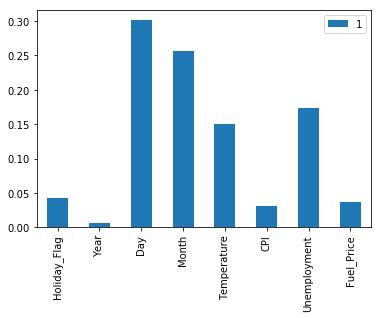

In [153]:
(pd.DataFrame([X.columns,rf.feature_importances_],columns=['Holiday_Flag', 'Year', 'Day', 'Month', 'Temperature', 'CPI', 'Unemployment', 'Fuel_Price']).T).plot.bar()